$$
\newcommand{\mat}[1]{\boldsymbol {#1}}
\newcommand{\mattr}[1]{\boldsymbol {#1}^\top}
\newcommand{\matinv}[1]{\boldsymbol {#1}^{-1}}
\newcommand{\vec}[1]{\boldsymbol {#1}}
\newcommand{\vectr}[1]{\boldsymbol {#1}^\top}
\newcommand{\rvar}[1]{\mathrm {#1}}
\newcommand{\rvec}[1]{\boldsymbol{\mathrm{#1}}}
\newcommand{\diag}{\mathop{\mathrm {diag}}}
\newcommand{\set}[1]{\mathbb {#1}}
\newcommand{\norm}[1]{\left\lVert#1\right\rVert}
\newcommand{\pderiv}[2]{\frac{\partial #1}{\partial #2}}
\newcommand{\bb}[1]{\boldsymbol{#1}}
$$
# Part 6: YOLO - Objects Detection
<a id=part6></a>

In this part we will use an object detection architecture called YOLO (You only look once) to detect objects in images. We'll use an already trained model weights (v5) found here: https://github.com/ultralytics/yolov5

In [85]:
import torch

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Load the YOLO model
model = torch.hub.load("ultralytics/yolov5", "yolov5s")
model.to(device)
# Images
img1 = 'imgs/DolphinsInTheSky.jpg'  
img2 = 'imgs/cat-shiba-inu-2.jpg' 

Using cache found in /Users/foadhijab/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2023-5-18 Python-3.8.12 torch-1.10.1 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


## Inference with YOLO
<a id=part6_1></a>

You are provided with 2 images (img1 and img2).
**TODO**:
1. Detect objects using the YOLOv5 model for these 2 images.
2. Print the inference output with bounding boxes.
3. Calculate the number of pixels within a bounding box and the number in the background.
   
   **Hint**: Given you stored the model output in a varibale named 'results', you may find 'results.pandas().xyxy' helpful 
4. Look at the inference results and answer the question below.


box 1 area: 6226.572950865142
box 2 area: 7591.8023373185315
box 3 area: 1421.156153546006
intersect 1 area: 0.0
intersect 2 area: 1284.9447040316882
intersect 3 area: 792.1532823697198
bounding box area: 13162.433455328272
background Area: 37162.56654467173


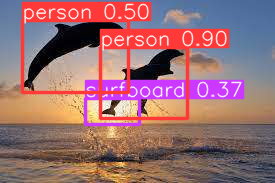

box 1 area: 166120.16878894283
box 2 area: 166799.7397524342
box 3 area: 166169.92929420713
intersect 1 area: 0.0
intersect 2 area: 0.0
intersect 3 area: 863.899011851754
bounding box area: 498225.93882373243
background Area: 64274.06117626757


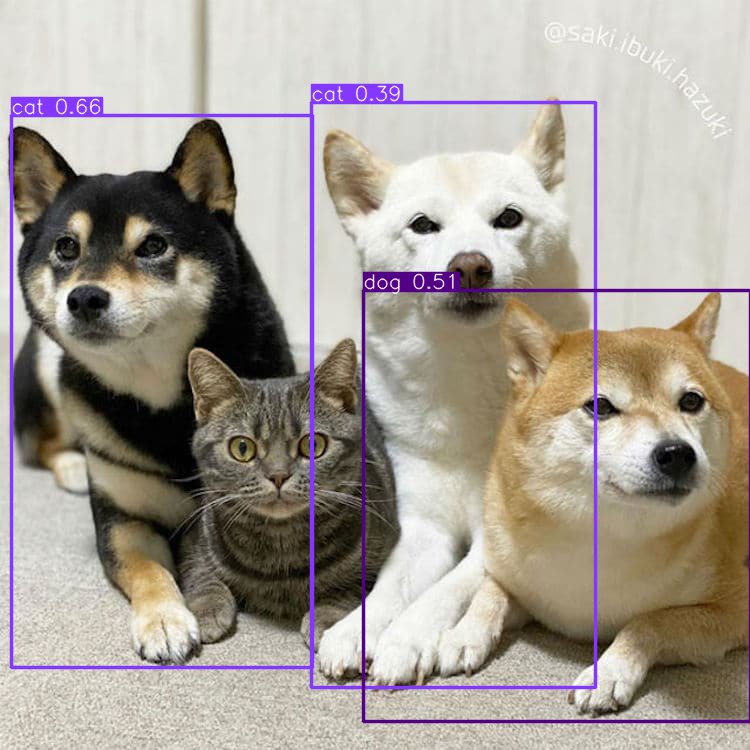

In [86]:
#Insert the inference code here.
from PIL import Image

def calc_pixels(bounding_box):
    # Assuming you have a list of bounding box coordinates stored in separate variables
    box1_xmin ,box1_ymin ,box1_xmax ,box1_ymax = bounding_box.values[0]
    box2_xmin ,box2_ymin ,box2_xmax ,box2_ymax = bounding_box.values[1]
    box3_xmin ,box3_ymin ,box3_xmax ,box3_ymax = bounding_box.values[2]
    box1_area = (box1_xmax - box1_xmin) * (box1_ymax - box1_ymin)
    print("box 1 area:",box1_area)
    box2_area = (box2_xmax - box2_xmin) * (box2_ymax - box2_ymin)
    print("box 2 area:",box2_area)
    box3_area = (box3_xmax - box3_xmin) * (box3_ymax - box3_ymin)
    print("box 3 area:",box3_area)
    intersect1_xmin = max(box1_xmin, box2_xmin, box3_xmin)
    intersect1_ymin = max(box1_ymin, box2_ymin, box3_ymin)
    intersect1_xmax = min(box1_xmax, box2_xmax, box3_xmax)
    intersect1_ymax = min(box1_ymax, box2_ymax, box3_ymax)
    intersect1_area = max(0, intersect1_xmax - intersect1_xmin) * max(0, intersect1_ymax - intersect1_ymin)
    print("intersect 1 area:",intersect1_area)
    intersect2_xmin = max(box1_xmin, box2_xmin)
    intersect2_ymin = max(box1_ymin, box2_ymin)
    intersect2_xmax = min(box1_xmax, box2_xmax)
    intersect2_ymax = min(box1_ymax, box2_ymax)
    intersect2_area = max(0, intersect2_xmax - intersect2_xmin) * max(0, intersect2_ymax - intersect2_ymin)
    print("intersect 2 area:",intersect2_area)
    intersect3_xmin = max(box1_xmin, box3_xmin)
    intersect3_ymin = max(box1_ymin, box3_ymin)
    intersect3_xmax = min(box1_xmax, box3_xmax)
    intersect3_ymax = min(box1_ymax, box3_ymax)
    intersect3_area = max(0, intersect3_xmax - intersect3_xmin) * max(0, intersect3_ymax - intersect3_ymin)
    print("intersect 3 area:",intersect3_area)
    total_area = box1_area + box2_area + box3_area - intersect1_area - intersect2_area - intersect3_area
    print("bounding box area:", total_area)
    return total_area
with torch.no_grad():
    pass
def image_data(path):
    image = model(path)
    image_dims = Image.open(path)
    image_width, image_height = image_dims.size
    tmp = image.pandas().xyxy[0]
    bounding_boxes_image = tmp[['xmin', 'ymin', 'xmax', 'ymax']]
    bounding_area = calc_pixels(bounding_boxes_image)
    print("background Area:", image_width*image_height - bounding_area)
    image.show()    
    
image_data('imgs/DolphinsInTheSky.jpg')
image_data('imgs/cat-shiba-inu-2.jpg')





### Question 1

Analyze the inference results of the 2 images. 
1. How well did the model detect the objects in the pictures?
2. What can possibly be the reason for the model failures? suggest methods to resolve that issue.

In [174]:
from cs236781.answers import display_answer
import hw2.answers

In [175]:
display_answer(hw2.answers.part6_q1)



**Your answer:**
1.
The model did not do so good considering it only got 1 of the 6 objects correctly and it did not even identify some of the objects
2.
for the dolphin's case, we can argue that we did not have a dolphin class to begin with, therefore the model did not even get the chance to learn the class and therefore it detects other things (the model falsely detected a dolphin as a person with 0.9 which gives the indication that it did not even have a dolphin class)
for the cats/dogs case we know for ceratin that there is a dog class considering the model detected a dog once, however the training set may not have been good enough to train the model to detect accurately, maybe the model resorted to a color scheme that is resinates with cats and therefore when dogs of the same color were shown the model thought that they were cats.

Write your answer using **markdown** and $\LaTeX$:
```python
# A code block
a = 2
```
An equation: $e^{i\pi} -1 = 0$



## Creative Detection Failures

<a id=part6_2></a>

Object detection pitfalls could be, for example: **occlusion** - when the objects are partially occlude, and thus missing important features, **model bias** - when a model learn some bias about an object, it could recognize it as something else in a different setup, and many others like **Deformation**, **Illumination conditions**, **Cluttered** or **textured background and blurring** due to moving objects.

**TODO**: Take pictures and that demonstrates 3 of the above object detection pitfalls, run inference and analyze the results.

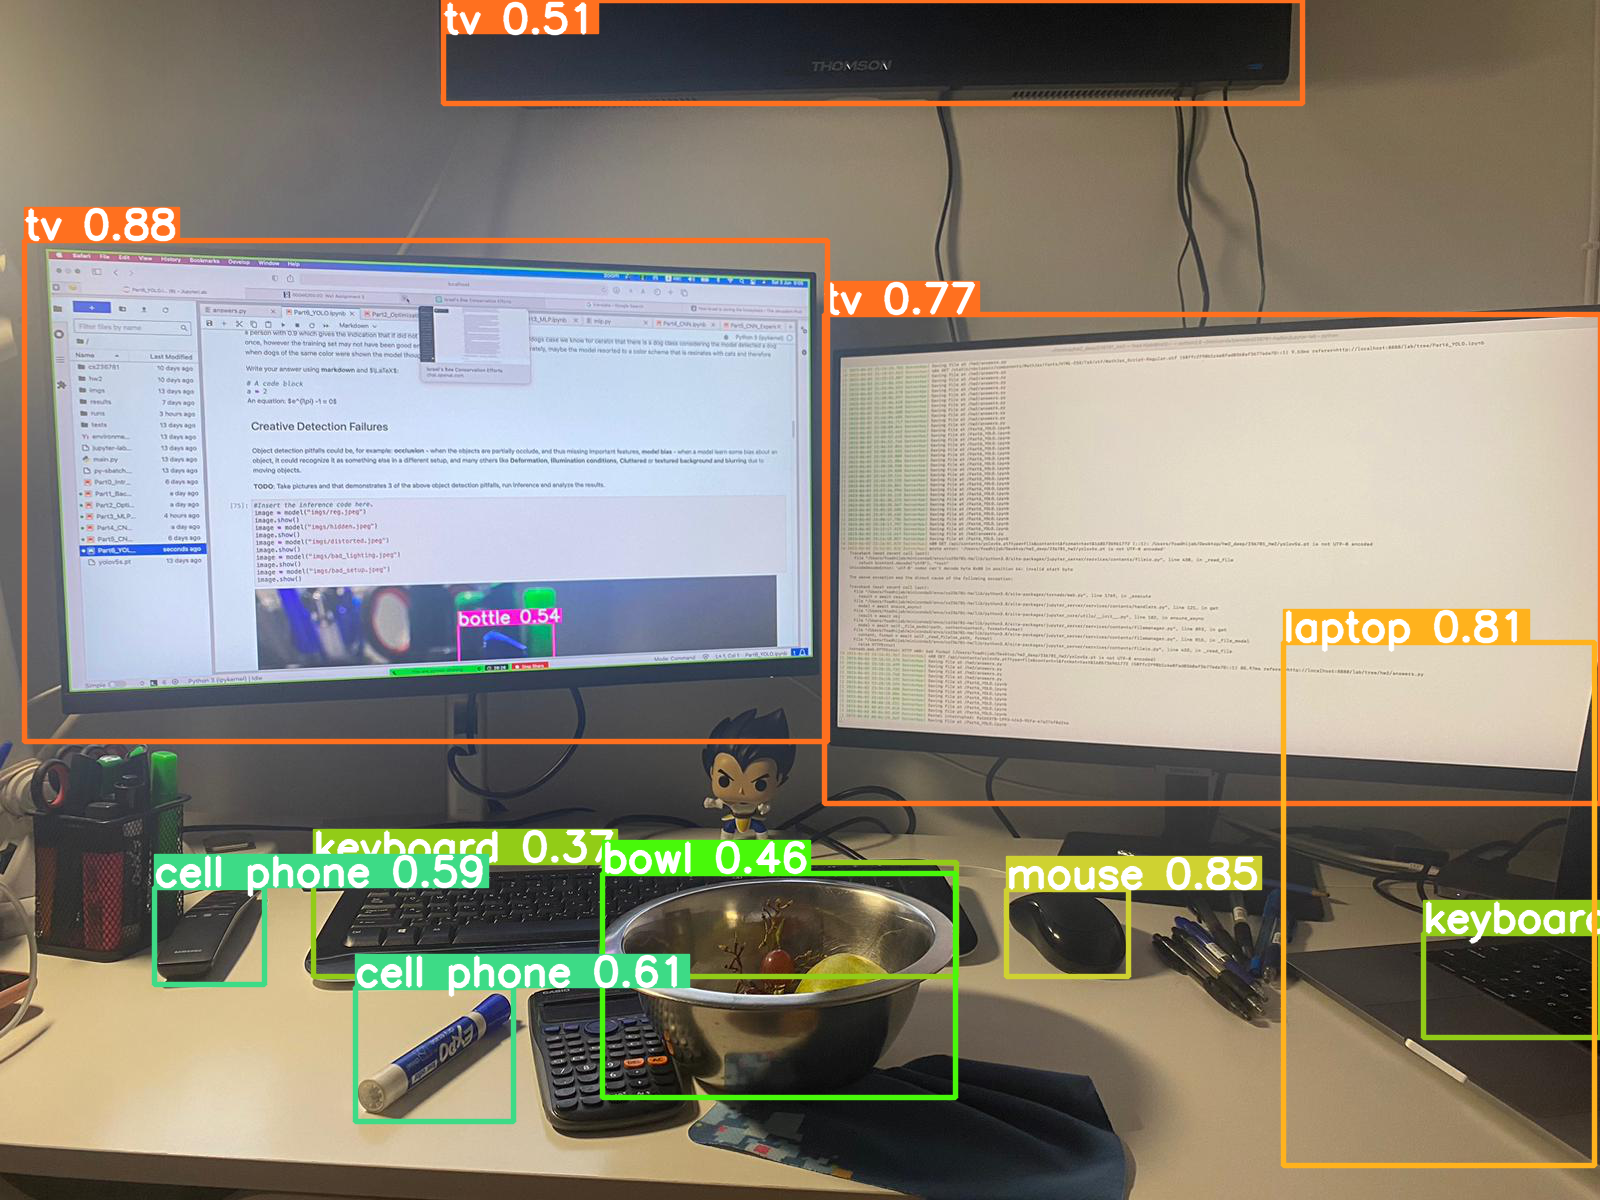

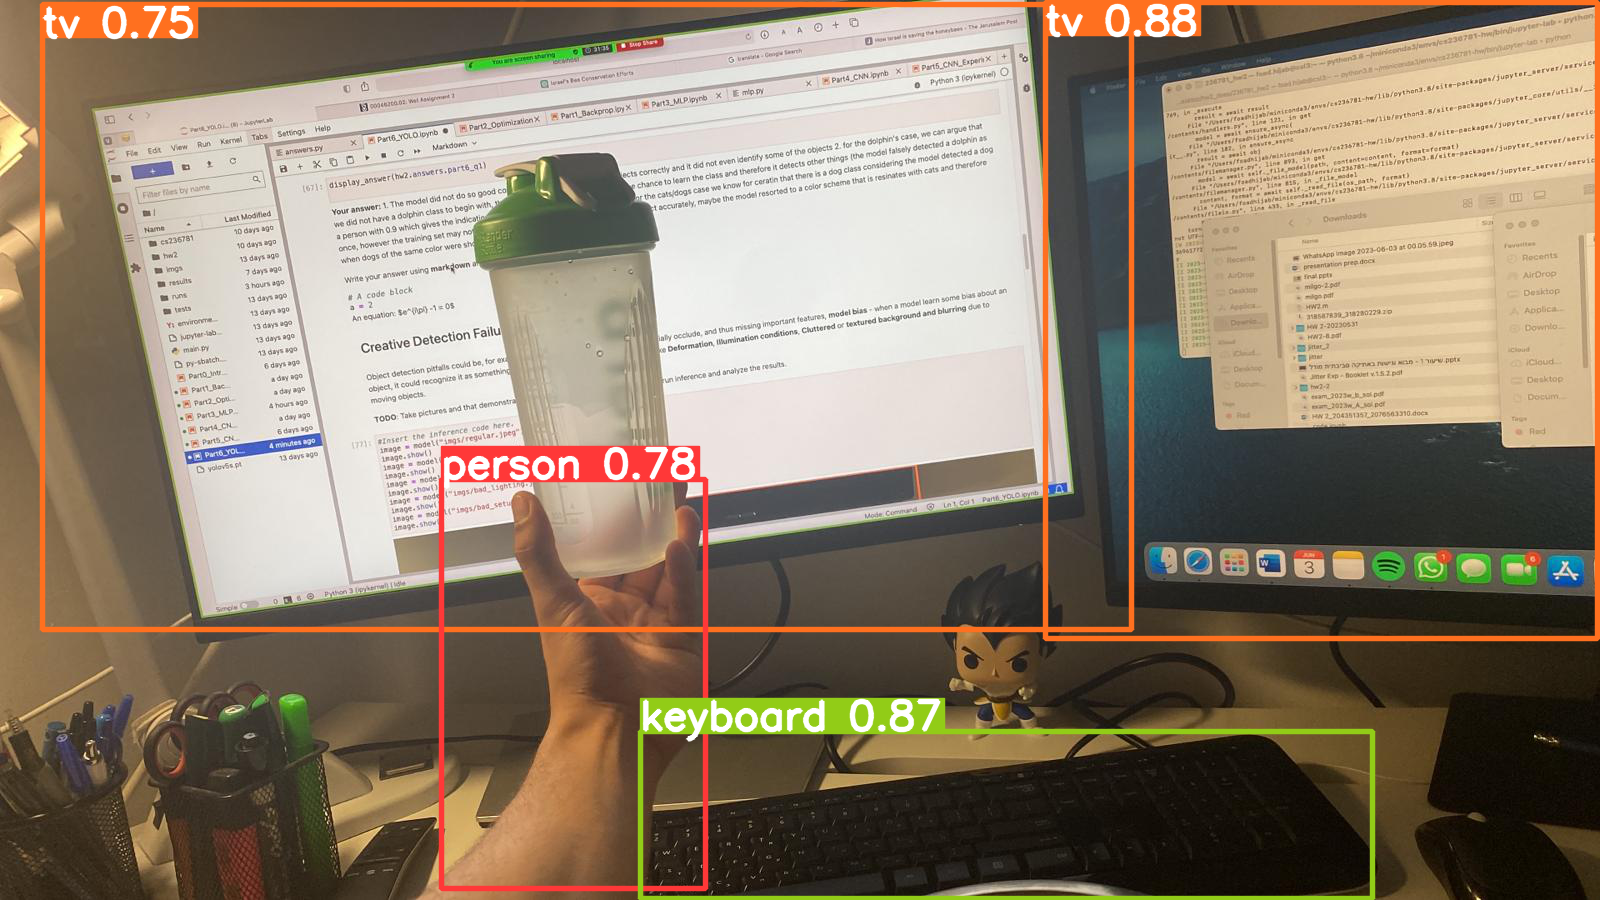

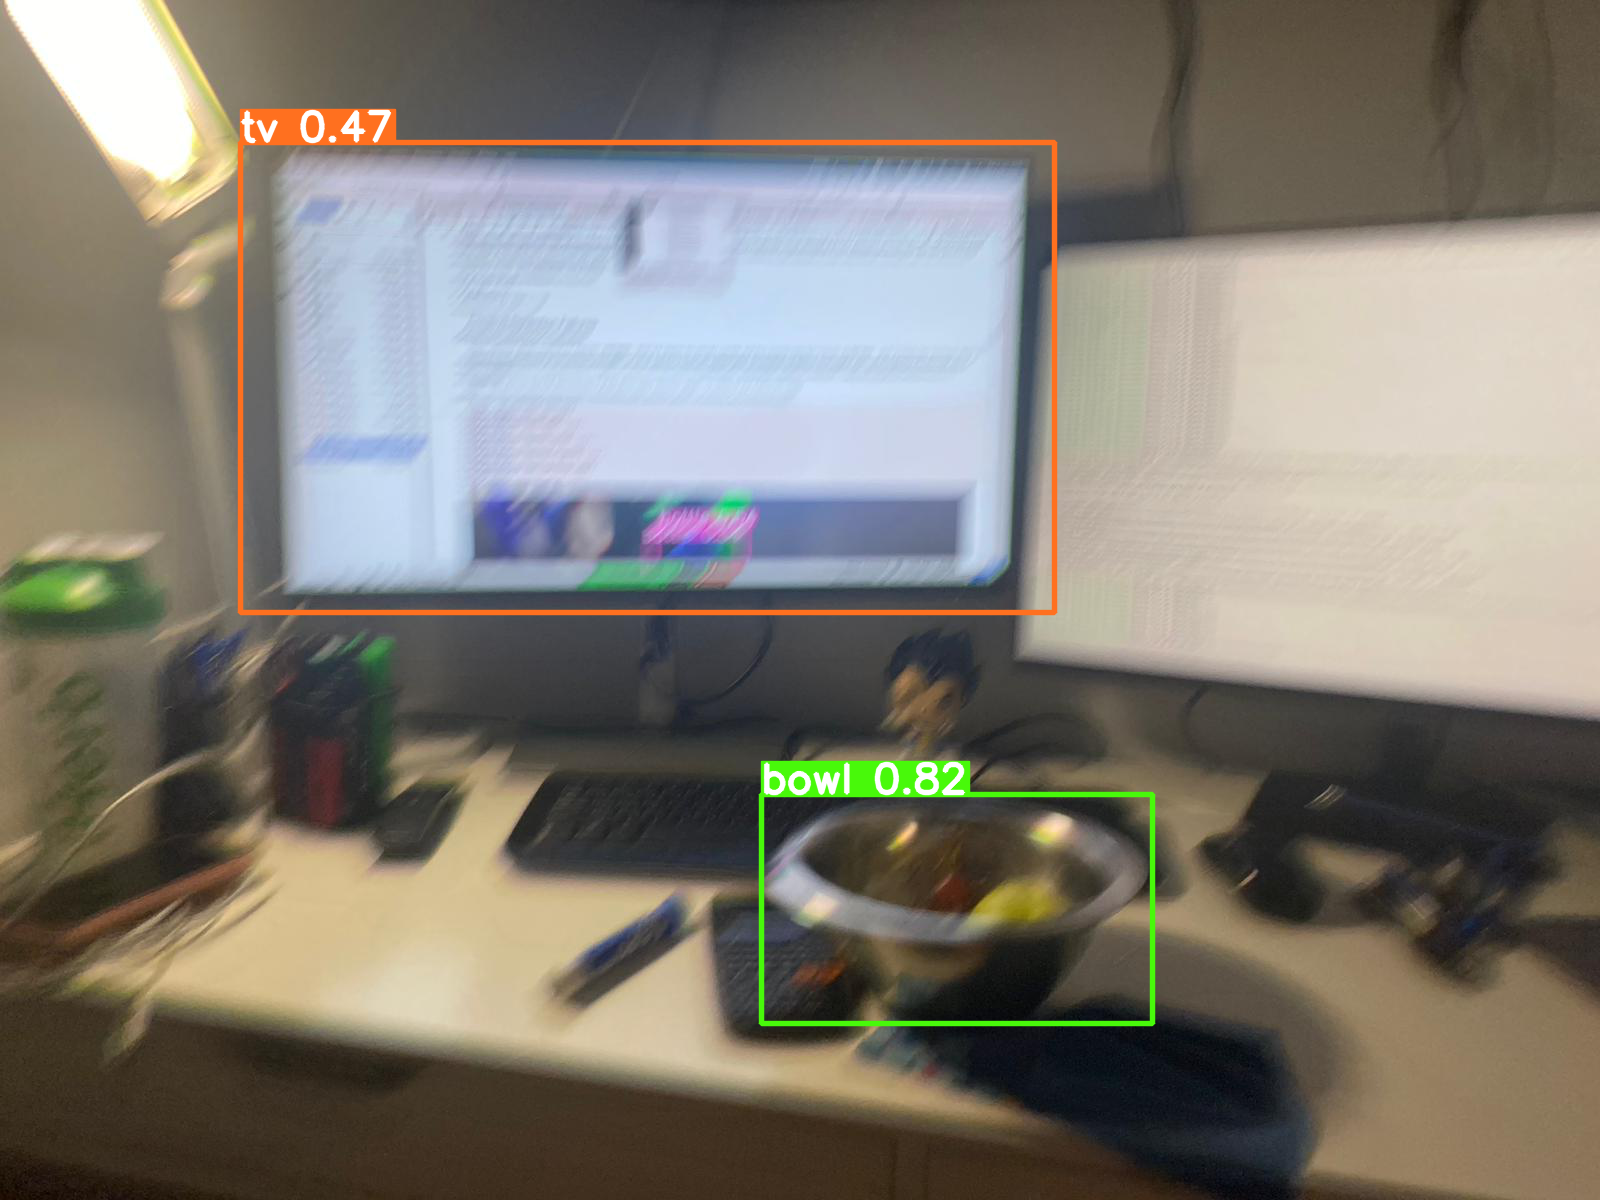

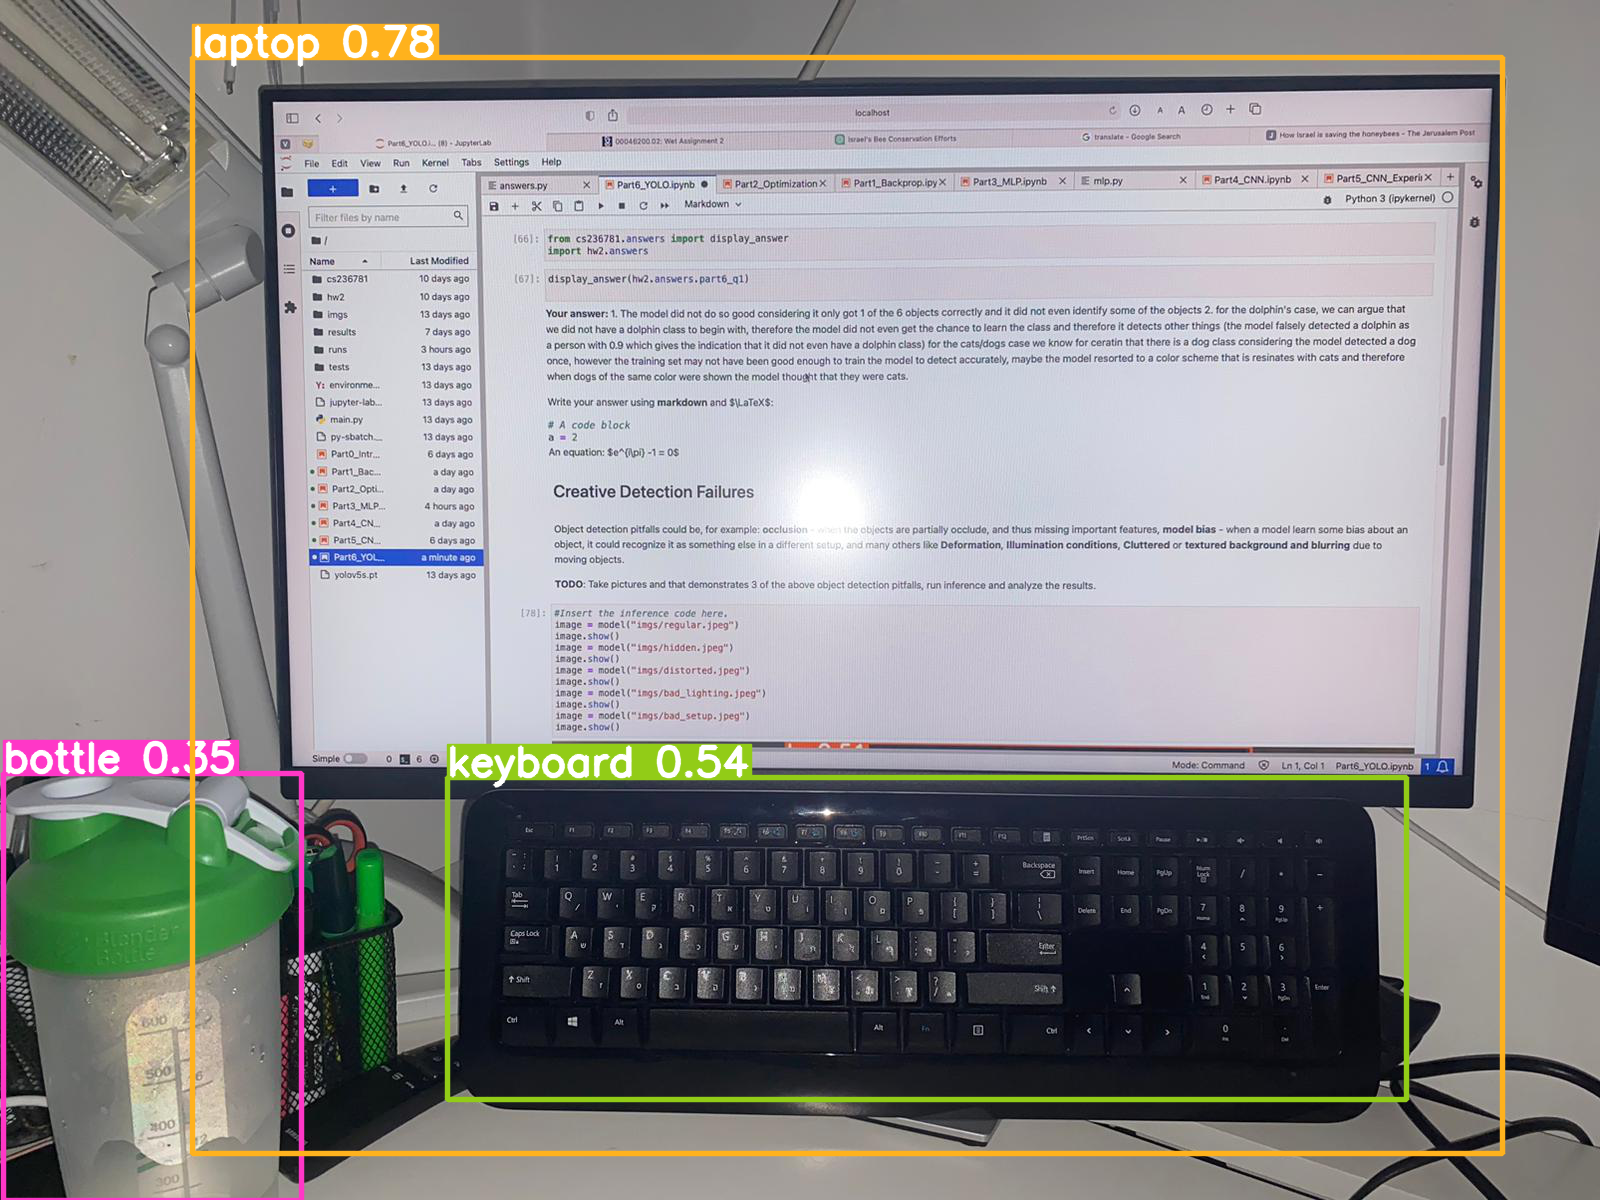

In [176]:
#Insert the inference code here.
image = model("imgs/regular.jpeg")
image.show()    
image = model("imgs/occlusion.jpeg")
image.show()    
image = model("imgs/distorted.jpeg")
image.show()    
image = model("imgs/bias.jpeg")
image.show()  

### Question 3

Analyize the results of the inference. 
1. How well did the model detect the objects in the pictures? explain.


In [177]:
display_answer(hw2.answers.part6_q3)



**Your answer:**


Write your answer using **markdown** and $\LaTeX$:
```python
# A code block
a = 2
```
An equation: $e^{i\pi} -1 = 0$



## Bonus 
<a id=part6_3></a>

Try improving the model performance over poorly recognized images by changing them. 
Describe the manipulations you did to the pictures.

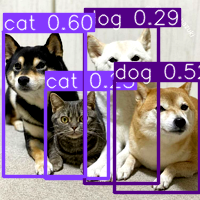

In [178]:
#insert bonus code here
from PIL import Image, ImageEnhance

# Open the image
image = Image.open("imgs/cat-shiba-inu-2.jpg")

# 1. Image Resizing
target_size = (200, 200) 
enhanced_image = image.resize(target_size)
contrast_enhancer = ImageEnhance.Contrast(enhanced_image)
enhanced_image = contrast_enhancer.enhance(1.2)
sharpness_enhancer = ImageEnhance.Sharpness(enhanced_image)
enhanced_image = sharpness_enhancer.enhance(1.2)

# Save the manipulated image
final_image = model(enhanced_image)
final_image.show()

### Questions

**TODO** Answer the following questions. Write your answers in the appropriate variables in the module `hw2/answers.py`.


In [179]:
display_answer(hw2.answers.part6_bonus)



**Your answer:**


Write your answer using **markdown** and $\LaTeX$:
```python
# A code block
a = 2
```
An equation: $e^{i\pi} -1 = 0$

